# LIBRARY

In [1]:
import neurokit2 as nk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import scipy.io.wavfile
from scipy import signal
from sklearn.preprocessing import MinMaxScaler
import os

# AKUISISI

In [2]:
path_file = os.listdir('data/data_fix/')
label = [filesname.replace('.csv', '') for filesname in path_file]

# label
file = {}
for no_label in label:
    data = pd.read_csv(f'data/data_fix/{no_label}.csv')
    file[no_label] = data
    globals()[no_label] = data

# WINDOWING/SEGMENTASI

In [3]:
window_size = 3000
window_step = 1800


file_segmen = []
for no_segmen in range(0,len(label)):
    file[label[no_segmen]].columns = ["num","ir","waktu"]
    path1 = file[label[no_segmen]][(file[label[no_segmen]].waktu >10)]
    path1 = path1[(path1.waktu <=190)]
    
    for no_window in range(0,len(path1),window_step):
        window = path1[no_window:no_window+window_size]
        file_segmen.append(window)

In [4]:
len(file_segmen[0])

3000

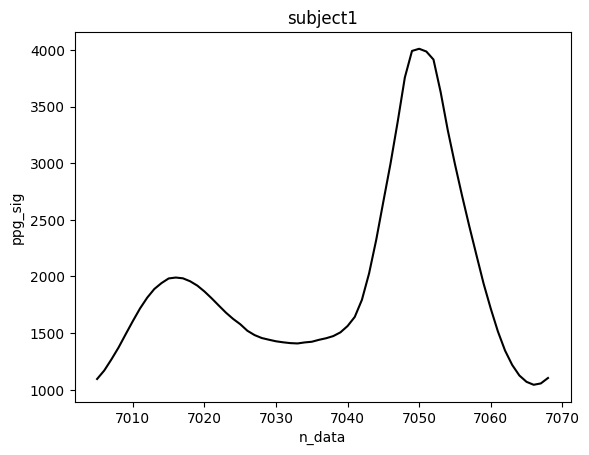

In [5]:
# andika_tkr['ir'].plot(title = 'subject1',xlabel = 'n_data', ylabel = 'ppg_sig', color = 'black');
# aldi_tkr
angka = 7005
andika_tkr['ir'][angka:angka+64].plot(title = 'subject1',xlabel = 'n_data', ylabel = 'ppg_sig', color = 'black');

<Axes: >

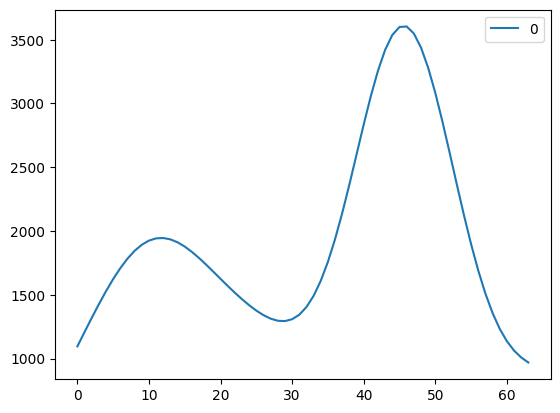

In [6]:
import heartpy as hp
filtered = hp.filter_signal(andika_tkr['ir'][7005:7005+64], cutoff = 5, sample_rate = 100.0, order = 3, filtertype='lowpass')
pd.DataFrame(filtered).plot()

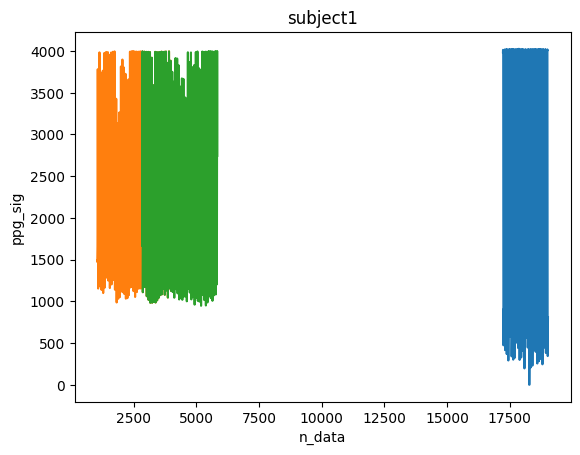

In [7]:
a = (file_segmen[29])['ir']
b = (file_segmen[30])['ir']
c = (file_segmen[31])['ir']

a.plot(title = 'subject1',xlabel = 'n_data',ylabel = 'ppg_sig');
b.plot();
c.plot();

# NORMALIZE
## VARIANCE BPM & STD BPM

In [8]:
info = []
minmaxx = []
signals = []
data_var = []
data_std = []
ppg_elgendi = []
for no_minmax in range(0,len(file_segmen)):
    minmax = MinMaxScaler(feature_range=(0,1))
    
    path_minmax1 = minmax.fit_transform(file_segmen[no_minmax])
    path_minmax_seg1 = pd.DataFrame(path_minmax1)[1]
    path_minmax_seg1 = nk.ppg_clean(path_minmax_seg1, sampling_rate=100, method='elgendi')
    ppg_elgendi.append(path_minmax_seg1)
    path_minmax_seg1 = pd.DataFrame(path_minmax_seg1)

    signals1, info1 = nk.ppg_process(path_minmax_seg1, sampling_rate=100)

    minmaxx.append(path_minmax_seg1)
    signals.append(signals1)
    info.append(info1)

    data_var.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().var()))
    data_std.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().std()))

C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_5232\3818205109.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_var.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().var()))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_5232\3818205109.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_std.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().std()))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_5232\3818205109.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data_var.append(float(pd.DataFrame(info1['PPG_Peaks']).diff().var()))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_5232\3818205109.py:23: FutureWarning: Calling float on a single element Series is deprecated and will 

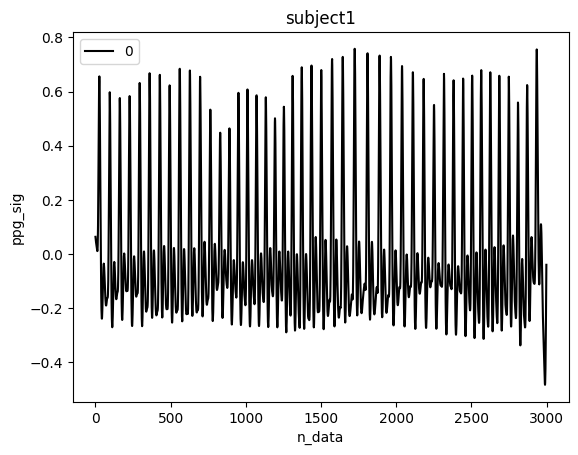

In [9]:
minmaxx[30].plot(title = 'subject1',xlabel = 'n_data',ylabel = 'ppg_sig', color = 'black');

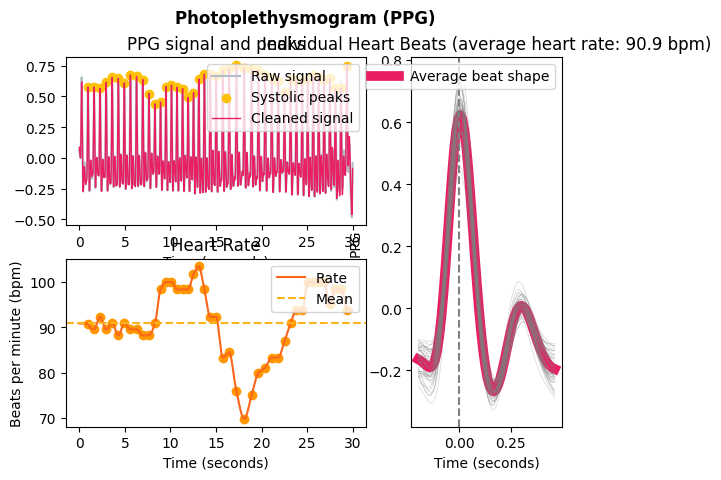

In [10]:
a = (signals[0])
b = (signals[1])
c = (signals[30])

# a['PPG_Clean'].plot()
# b['PPG_Clean'].plot()
# c['PPG_Clean'].plot(title = 'subject1',xlabel = 'n_data',ylabel = 'ppg_sig', color = 'black')

nk.ppg_plot(signals[30], info[30])
# nk.ppg_plot(signals[130], info1[30])
# info[30]

# BPM & HRV

In [11]:
analyze_signals = []
bpm = []
hrv = []
rmssd = []
sdnn = []
for no_analyze in range(0,len(file_segmen)):
    analyze_signals1 = nk.ppg_analyze(signals[no_analyze], sampling_rate=100)

    analyze_signals.append(analyze_signals1)
    bpm.append(float(analyze_signals1['PPG_Rate_Mean']))
    hrv.append(float(analyze_signals1['HRV_MeanNN']))
    rmssd.append(float(analyze_signals1['HRV_RMSSD']))
    sdnn.append(float(analyze_signals1['HRV_SDNN']))
    
    

C:\Users\MY ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_5232\286699480.py:10: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  bpm.append(float(analyze_signals1['PPG_Rate_Mean']))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_5232\286699480.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  hrv.append(float(analyze_signals1['HRV_MeanNN']))
C:\Users\MY ASUS\AppDa

In [28]:
analyze_signals[30][['PPG_Rate_Mean','HRV_MeanNN','HRV_SDNN','HRV_RMSSD']]

,PPG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_RMSSD
0,90.899353,660.465116,61.642344,29.640706


In [25]:
pd.DataFrame(bpm).mean()

0    90.314477
dtype: float64

In [12]:
# analyze_signals[30].to_excel('analisis30.xlsx')

In [13]:
# ppg_elgendi = []
# for no_ppgelgendi in range(0,len(file_segmen)): 
#         ppg_elgendi1 = nk.ppg_clean(minmaxx[no_ppgelgendi], sampling_rate=100, method='elgendi')
#         ppg_elgendi.append(ppg_elgendi1)

<Axes: >

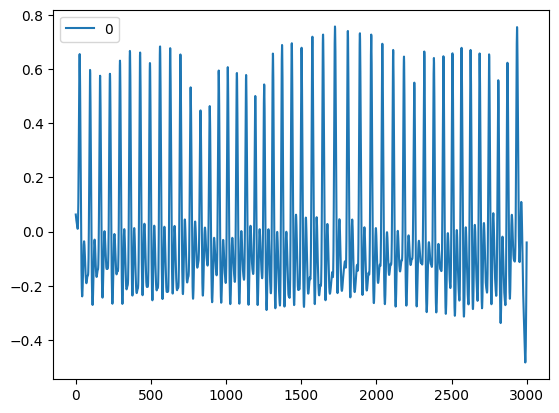

In [14]:
pd.DataFrame(minmaxx[30]).plot()

# SISTOL&DIASTOL&DISTANCE

In [75]:
sistol = []
diastol = []
distance = []
peak_sistol = {}
peak_diastol = {}

for no_sisdis in range(0,len(file_segmen)):  
    path = ppg_elgendi[no_sisdis]
    med = path.max()/4
    sistol1 = []
    for i in range(1, len(path) - 1):
        if path[i] > path[i - 1] and path[i] > path[i + 1] and path[i] > med:
            sistol1.append(i)


    diastol1 = []
    for i in range(1, len(path) - 1):
        if path[i] > path[i - 1] and path[i] > path[i + 1] and path[i] < med:
            diastol1.append(i)

    peak_sistol[no_sisdis] = sistol1
    peak_diastol[no_sisdis] = diastol1
    sistol.append(float(pd.DataFrame(path[sistol1]).mean()))
    diastol.append(float(pd.DataFrame(path[diastol1]).mean()))
    distance.append(float(pd.DataFrame(path[sistol1]).mean())-float(pd.DataFrame(path[diastol1]).mean()))

    # plt.plot(path);
    # plt.plot(diastol1, path[diastol1], "x");
    # plt.plot(sistol1, path[sistol1], "x");

C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_5232\3788574392.py:23: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  sistol.append(float(pd.DataFrame(path[sistol1]).mean()))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_5232\3788574392.py:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  diastol.append(float(pd.DataFrame(path[diastol1]).mean()))
C:\Users\MY ASUS\AppData\Local\Temp\ipykernel_5232\3788574392.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  distance.append(float(pd.DataFrame(path[sistol1]).mean())-float(pd.DataFrame(path[diastol1]).mean()))


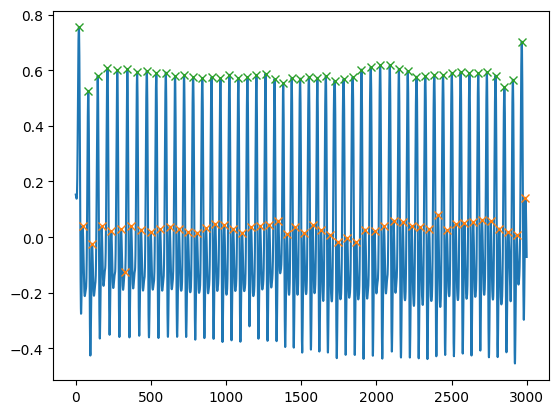

In [94]:
no = 124
for no_sisdis in range(no,no+1):  
    path = ppg_elgendi[no_sisdis]
    med = path.max()/4
    sistol1 = []
    for i in range(1, len(path) - 1):
        if path[i] > path[i - 1] and path[i] > path[i + 1] and path[i] > med:
            sistol1.append(i)


    diastol1 = []
    for i in range(1, len(path) - 1):
        if path[i] > path[i - 1] and path[i] > path[i + 1] and path[i] < med:
            diastol1.append(i)

    # peak_sistol[no_sisdis] = sistol1
    # peak_diastol[no_sisdis] = diastol1
    # sistol.append(float(pd.DataFrame(path[sistol1]).mean()))
    # diastol.append(float(pd.DataFrame(path[diastol1]).mean()))
    # distance.append(float(pd.DataFrame(path[sistol1]).mean())-float(pd.DataFrame(path[diastol1]).mean()))

    plt.plot(path);
    plt.plot(diastol1, path[diastol1], "x");
    plt.plot(sistol1, path[sistol1], "x");

In [73]:
a = pd.DataFrame(ppg_elgendi[30])
peaks_diastol = diastol1
# peaks_sistol = sistol1
# peaks_diastol
# import matplotlib.pyplot as plt
# plt.plot(a);
# plt.plot(peaks_diastol, a[peaks_diastol], "x");
# plt.plot(peaks_sistol, nasah[peaks_sistol], "x");

[       num    ir  waktu
 1096  1096  2246   11.0
 1097  1097  2268   11.0
 1098  1098  2267   11.0
 1099  1099  2238   11.0
 1100  1100  2213   11.0
 ...    ...   ...    ...
 4091  4091  1670   40.0
 4092  4092  1666   40.0
 4093  4093  1663   40.0
 4094  4094  1666   40.0
 4095  4095  1667   40.0
 
 [3000 rows x 3 columns],
        num    ir  waktu
 2896  2896  1970   29.0
 2897  2897  1962   29.0
 2898  2898  1950   29.0
 2899  2899  1941   29.0
 2900  2900  1936   29.0
 ...    ...   ...    ...
 5891  5891  2531   58.0
 5892  5892  2453   58.0
 5893  5893  2368   58.0
 5894  5894  2317   58.0
 5895  5895  2244   58.0
 
 [3000 rows x 3 columns],
        num    ir  waktu
 4696  4696  1734   47.0
 4697  4697  1743   47.0
 4698  4698  1747   47.0
 4699  4699  1744   47.0
 4700  4700  1719   47.0
 ...    ...   ...    ...
 7691  7691  2170   76.0
 7692  7692  2142   76.0
 7693  7693  2113   76.0
 7694  7694  2087   76.0
 7695  7695  2062   76.0
 
 [3000 rows x 3 columns],
        num    i

# DATAFRAME

In [16]:
dataajah = {'BPM':bpm,'HRV':hrv,'RMSSD':rmssd,'SDNN':sdnn,'VAR':data_var,'STD':data_std,'SISTOL':sistol,'DIASTOL':diastol,'DISTANCE':distance}

In [17]:
dataaaaa = pd.DataFrame(dataajah)
# dataaaaa.to_excel('DATA_KNN_1500x1500.xlsx')

# LABELING

In [18]:
bahan_label = pd.read_excel('excel/label.xlsx')
nama = bahan_label['nama'] 
kecemasan = bahan_label['kecemasan'] 
angka_kecemasan = bahan_label['angka_kecemasan']

In [19]:
180/18

10.0

In [20]:
named = []
anxd = []
anganxd = []
for name,anx,anganx in zip(nama,kecemasan,angka_kecemasan):
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)
    named.append(name)

    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)
    anxd.append(anx)

    anganxd.append(anganx)
    anganxd.append(anganx)
    anganxd.append(anganx)
    anganxd.append(anganx)
    anganxd.append(anganx)
    anganxd.append(anganx)
    anganxd.append(anganx)
    anganxd.append(anganx)
    anganxd.append(anganx)
    anganxd.append(anganx)


anxd = pd.DataFrame(anxd)
anxd.column = 'KECEMASAN'
anganxd = pd.DataFrame(anganxd)
anganxd.column = 'KECEMASAN REGRESI'
named = pd.DataFrame(named)
named.column = 'NAMA'


a = pd.concat([named,dataaaaa,anxd,anganxd], axis=True)
a.columns = [
'NAMA',
'BPM',
'HRV',
'RMSSD',
'SDNN',
'VAR',
'STD',
'SISTOL',
'DIASTOL',
'DISTANCE',
'KECEMASAN',
'KECEMASAN_REGRESI']


In [21]:
# a.to_excel('excel/bahan_knn_new/DATA_KNN_3000x1800_NEW.xlsx')